1. Data preprocessing:

In [308]:
# Set working directory:
import os

os.chdir('/Users/lowet/Documents/000-Files/02-study/01-University/04-MSU/2023 Summer/01-STT_490/04-Project/02-Data/')

print(os.getcwd())

/Users/lowet/Documents/000-Files/02-study/01-University/04-MSU/2023 Summer/01-STT_490/04-Project/02-Data


In [1]:
# Load datasets:
import numpy as np
import pandas as pd
import scanpy as sc 

### Cases dataset
cases_data = sc.read_h5ad("../02-Data/Cases/cases.h5ad")
print(cases_data)

cases_data.write_csvs(dirname = '../02-Data/Cases', skip_data = False, sep = ',')

# cases_X and cases_y
cases_X = pd.read_csv("../02-Data/Cases/X.csv", header=None)
print(cases_X.shape)

cases_y = pd.read_csv("../02-Data/Cases/obs.csv")
cases_y = cases_y['seurat_clusters']
print(cases_y.shape)

# Convert csv file to txt file
def convert_csv_to_txt(csv_file, txt_file):
    df = pd.read_csv(csv_file)
    df.to_csv(txt_file, sep='\t', header = False, index=False)

cases_X.to_csv("../02-Data/Cases/cases_X.csv")
csv_file = '../02-Data/Cases/cases_X.csv'
txt_file = '../02-Data/Cases/cases_X0.txt'
convert_csv_to_txt(csv_file, txt_file)

cases_y.to_csv("../02-Data/Cases/cases_y.csv")
csv_file = '../02-Data/Cases/cases_y.csv'
txt_file = '../02-Data/Cases/cases_y0.txt'
convert_csv_to_txt(csv_file, txt_file)

# Delete the first column of txt files
f = open("../02-Data/Cases/cases_X0.txt", "r")
g = open("../02-Data/Cases/cases_X.txt", "w")

for line in f:
    if line.strip():
        g.write("\t".join(line.split()[1:]) + "\n")

f.close()
g.close()

f = open("../02-Data/Cases/cases_y0.txt", "r")
g = open("../02-Data/Cases/cases_y.txt", "w")

for line in f:
    if line.strip():
        g.write("\t".join(line.split()[1:]) + "\n")

f.close()
g.close()

# Convert txt file to csv file for checking:
read_file = pd.read_csv (r'../02-Data/Cases/cases_X.txt')
read_file.to_csv (r'../02-Data/Cases/cases_X1.csv', index=None)

read_file = pd.read_csv (r'../02-Data/Cases/cases_y.txt')
read_file.to_csv (r'../02-Data/Cases/cases_y1.csv', index=None)

AnnData object with n_obs × n_vars = 5105 × 21209
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'integrated_snn_res.0.5', 'seurat_clusters'
    var: 'features'
    obsm: 'X_umap'
(5105, 21209)
(5105,)


In [2]:
### Controls dataset
controls_data = sc.read_h5ad("../02-Data/Controls/controls.h5ad")
print(controls_data)

controls_data.write_csvs(dirname = '../02-Data/Controls', skip_data = False, sep = ',')

# controls_X and controls_y
controls_X = pd.read_csv("../02-Data/Controls/X.csv", header=None)
print(controls_X.shape)

controls_y = pd.read_csv("../02-Data/Controls/obs.csv")
controls_y = controls_y['seurat_clusters']
print(controls_y.shape)

# Convert csv file to txt file
def convert_csv_to_txt(csv_file, txt_file):
    df = pd.read_csv(csv_file)
    df.to_csv(txt_file, sep='\t', header = False, index=False)

controls_X.to_csv("../02-Data/Controls/controls_X.csv")
csv_file = '../02-Data/Controls/controls_X.csv'
txt_file = '../02-Data/Controls/controls_X0.txt'
convert_csv_to_txt(csv_file, txt_file)

controls_y.to_csv("../02-Data/Controls/controls_y.csv")
csv_file = '../02-Data/Controls/controls_y.csv'
txt_file = '../02-Data/Controls/controls_y0.txt'
convert_csv_to_txt(csv_file, txt_file)

# Delete the first column of txt files
f = open("../02-Data/Controls/controls_X0.txt", "r")
g = open("../02-Data/Controls/controls_X.txt", "w")

for line in f:
    if line.strip():
        g.write("\t".join(line.split()[1:]) + "\n")

f.close()
g.close()

f = open("../02-Data/Controls/controls_y0.txt", "r")
g = open("../02-Data/Controls/controls_y.txt", "w")

for line in f:
    if line.strip():
        g.write("\t".join(line.split()[1:]) + "\n")

f.close()
g.close()

# Convert txt file to csv file for checking:
read_file = pd.read_csv (r'../02-Data/Controls/controls_X.txt')
read_file.to_csv (r'../02-Data/Controls/controls_X1.csv', index=None)

read_file = pd.read_csv (r'../02-Data/Controls/controls_y.txt')
read_file.to_csv (r'../02-Data/Controls/controls_y1.csv', index=None)

/Users/lowet/mambaforge/envs/AI/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 1548 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'integrated_snn_res.0.5', 'seurat_clusters'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'
(1548, 2000)
(1548,)


2. Generate graphs:

In [309]:
import numpy as np
from sklearn.metrics import pairwise_distances as pair
from sklearn.preprocessing import normalize
topk = 10


def construct_graph(features, label, method):
#     fname = '../02-Data/Cases/cases_graph.txt'
    fname = '../02-Data/Controls/controls_graph.txt'
    num = len(label)

    dist = None
    # Several methods of calculating the similarity relationship between samples i and j (similarity matrix Sij)
    if method == 'heat':
        dist = -0.5 * pair(features, metric='manhattan') ** 2
        dist = np.exp(dist)

    elif method == 'cos':
        features[features > 0] = 1
        dist = np.dot(features, features.T)

    elif method == 'ncos':
        features[features > 0] = 1
        features = normalize(features, axis=1, norm='l1')
        dist = np.dot(features, features.T)

    # elif method == 'cos':
    #     dist = np.dot(features, features.T) / (np.linalg.norm(features) * np.linalg.norm(features.T))

    elif method == 'p':
        y = features.T - np.mean(features.T)
        features = features - np.mean(features)
        dist = np.dot(features, features.T) / (np.linalg.norm(features) * np.linalg.norm(y))

    inds = []
    for i in range(dist.shape[0]):
        ind = np.argpartition(dist[i, :], -(topk + 1))[-(topk + 1):]
        inds.append(ind)

    f = open(fname, 'w')
    counter = 0
    A = np.zeros_like(dist)
    for i, v in enumerate(inds):
        mutual_knn = False
        for vv in v:
            if vv == i:
                pass
            else:
                if label[vv] != label[i]:
                    counter += 1
                f.write('{} {}\n'.format(i, vv))
    f.close()
    print('error rate: {}'.format(counter / (num * topk)))

In [310]:
### For cases:
# File = [Pre-training file,]
File = ['../02-Data/Cases/cases_X.txt', '../02-Data/Cases/cases_y.txt']
# Para = [batch_size, lr, epoch, n_cluster, n_init]
Para = [1024, 1e-3, 200, 5, 20]
# method = ['heat', 'cos', 'ncos' ,'p']
method = ['heat', 'cos', 'ncos', 'p']

number = np.loadtxt(File[0], dtype=float)
label = np.loadtxt(File[1], dtype=int)
construct_graph(number, label, method[3])

error rate: 0.43800195886385895


In [322]:
# Convert txt file to csv file for checking:
read_file = pd.read_csv (r'../02-Data/Cases/cases_graph.txt')
read_file.to_csv (r'../02-Data/Cases/cases_graph.csv', index=None)

df = pd.read_csv('../02-Data/Cases/cases_graph.csv')
df.shape

(51049, 1)

In [311]:
### For controlsS:
# File = [Pre-training file,]
File = ['../02-Data/Controls/controls_X.txt', '../02-Data/Controls/controls_y.txt']
# Para = [batch_size, lr, epoch, n_cluster, n_init]
Para = [1024, 1e-3, 200, 5, 20]
# method = ['heat', 'cos', 'ncos' ,'p']
method = ['heat', 'cos', 'ncos', 'p']

number = np.loadtxt(File[0], dtype=float)
label = np.loadtxt(File[1], dtype=int)
construct_graph(number, label, method[3])

error rate: 0.13837209302325582


In [321]:
# Convert txt file to csv file for checking:
read_file = pd.read_csv (r'../02-Data/Controls/controls_graph.txt')
read_file.to_csv (r'../02-Data/Controls/controls_graph.csv', index=None)

df = pd.read_csv('../02-Data/Controls/controls_graph.csv')
df.shape

(15482, 1)

3. Pre-training:

In [284]:
# evaluation
import numpy as np
from munkres import Munkres
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
from sklearn.metrics import adjusted_rand_score as ari_score
from sklearn import metrics

def cluster_acc(y_true, y_pred):
    y_true = y_true - np.min(y_true)
    l1 = list(set(y_true))
    numclass1 = len(l1)
    l2 = list(set(y_pred))
    numclass2 = len(l2)

    ind = 0
    if numclass1 != numclass2:
        for i in l1:
            if i in l2:
                pass
            else:
                y_pred[ind] = i
                ind += 1

    l2 = list(set(y_pred))
    numclass2 = len(l2)

    if numclass1 != numclass2:
        print('error')
        return

    cost = np.zeros((numclass1, numclass2), dtype=int)
    for i, c1 in enumerate(l1):
        mps = [i1 for i1, e1 in enumerate(y_true) if e1 == c1]
        for j, c2 in enumerate(l2):
            mps_d = [i1 for i1 in mps if y_pred[i1] == c2]
            cost[i][j] = len(mps_d)

    m = Munkres()
    cost = cost.__neg__().tolist()
    indexes = m.compute(cost)

    new_predict = np.zeros(len(y_pred))
    for i, c in enumerate(l1):
        c2 = l2[indexes[i][1]]
        ai = [ind for ind, elm in enumerate(y_pred) if elm == c2]
        new_predict[ai] = c

    acc = metrics.accuracy_score(y_true, new_predict)
    # y_true：Like 1d array or label indicator array/sparse matrix (correct) label
    # y_pred：Like a one-dimensional array or label indicator array/sparse matrix predicted labels, returned by the classifier
    f1_macro = metrics.f1_score(y_true, new_predict, average='macro')
    return acc, f1_macro


def eva(y_true, y_pred, epoch=0):
    acc, f1 = cluster_acc(y_true, y_pred)
    nmi = nmi_score(y_true, y_pred)
    ari = ari_score(y_true, y_pred)
    print(epoch, ':acc {:.4f}'.format(acc), ', nmi {:.4f}'.format(nmi), ', ari {:.4f}'.format(ari),
          ', f1 {:.4f}'.format(f1))
    return acc, f1, nmi, ari

In [23]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.nn import Linear
from torch.utils.data import Dataset
from sklearn.cluster import KMeans
import torch.nn.functional as F
import matplotlib.pyplot as plt

class AE(nn.Module):
    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                 n_input, n_z):
        super(AE, self).__init__()
        # encoder
        self.enc_1 = Linear(n_input, n_enc_1)
        self.BN1 = nn.BatchNorm1d(n_enc_1)
        self.enc_2 = Linear(n_enc_1, n_enc_2)
        self.BN2 = nn.BatchNorm1d(n_enc_2)
        self.enc_3 = Linear(n_enc_2, n_enc_3)
        self.BN3 = nn.BatchNorm1d(n_enc_3)
        self.z_layer = Linear(n_enc_3, n_z)

        # decoder
        self.dec_1 = Linear(n_z, n_dec_1)
        self.BN4 = nn.BatchNorm1d(n_dec_1)
        self.dec_2 = Linear(n_dec_1, n_dec_2)
        self.BN5 = nn.BatchNorm1d(n_dec_2)
        self.dec_3 = Linear(n_dec_2, n_dec_3)
        self.BN6 = nn.BatchNorm1d(n_dec_3)
        self.x_bar_layer = Linear(n_dec_3, n_input)


    def forward(self, x):
        enc_h1 = F.relu(self.BN1(self.enc_1(x)))
        enc_h2 = F.relu(self.BN2(self.enc_2(enc_h1)))
        enc_h3 = F.relu(self.BN3(self.enc_3(enc_h2)))

        z = self.z_layer(enc_h3)

        dec_h1 = F.relu(self.BN4(self.dec_1(z)))
        dec_h2 = F.relu(self.BN5(self.dec_2(dec_h1)))
        dec_h3 = F.relu(self.BN6(self.dec_3(dec_h2)))
        x_bar = self.x_bar_layer(dec_h3)

        return x_bar,  z


class LoadDataset(Dataset):
    def __init__(self, data):
        self.x = data

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return torch.from_numpy(np.array(self.x[idx])).float(), \
               torch.from_numpy(np.array(idx))


def pretrain_ae(model, dataset, y):
    train_loader = DataLoader(dataset, batch_size=Para[0], shuffle=True)
    print(model)
    
    loss_list = []
    acc_list = []
    f1_list = []
    nmi_list = []
    ari_list = []
    
    # Adam
    optimizer = Adam(model.parameters(), lr=Para[1])
    for epoch in range(Para[2]):
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x
            x_bar, _ = model(x)

            x_bar = x_bar.cpu()
            x = x.cpu()
            loss = F.mse_loss(x_bar, x)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            x = torch.Tensor(dataset.x).float()
            x_bar, z = model(x)
            loss = F.mse_loss(x_bar, x)
            loss_list.append(loss.item())
            print('{} loss: {}'.format(epoch, loss))
            kmeans = KMeans(n_clusters=Cluster_para[0], n_init=Cluster_para[1]).fit(z.data.cpu().numpy())
            acc, f1, nmi, ari = eva(y, kmeans.labels_, epoch)
            acc_list.append(acc)
            f1_list.append(f1)
            nmi_list.append(nmi)
            ari_list.append(ari)
        # Generate a pre-trained model
        torch.save(model.state_dict(), File[0])
        
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.plot(range(Para[2]), loss_list)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Epoch vs Loss')

    plt.subplot(2, 2, 2)
    plt.plot(range(Para[2]), acc_list)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Epoch vs Accuracy')

    plt.subplot(2, 2, 3)
    plt.plot(range(Para[2]), f1_list)
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Epoch vs F1 Score')

    plt.subplot(2, 2, 4)
    plt.plot(range(Para[2]), nmi_list, label='NMI')
    plt.plot(range(Para[2]), ari_list, label='ARI')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Epoch vs NMI/ARI')
    plt.legend()

    plt.tight_layout()
    plt.show()


AE(
  (enc_1): Linear(in_features=21209, out_features=500, bias=True)
  (BN1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_2): Linear(in_features=500, out_features=500, bias=True)
  (BN2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_3): Linear(in_features=500, out_features=2000, bias=True)
  (BN3): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (z_layer): Linear(in_features=2000, out_features=10, bias=True)
  (dec_1): Linear(in_features=10, out_features=2000, bias=True)
  (BN4): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dec_2): Linear(in_features=2000, out_features=500, bias=True)
  (BN5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dec_3): Linear(in_features=500, out_features=500, bias=True)
  (BN6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


88 loss: 0.11210519820451736
88 :acc 0.4456 , nmi 0.2813 , ari 0.1714 , f1 0.1740
89 loss: 0.11206584423780441
89 :acc 0.4452 , nmi 0.2812 , ari 0.1713 , f1 0.1727
90 loss: 0.11209238320589066
90 :acc 0.4452 , nmi 0.2825 , ari 0.1715 , f1 0.1728
91 loss: 0.11200768500566483
91 :acc 0.4454 , nmi 0.2812 , ari 0.1714 , f1 0.1734
92 loss: 0.11194116622209549
92 :acc 0.4458 , nmi 0.2815 , ari 0.1716 , f1 0.1740
93 loss: 0.1120600700378418
93 :acc 0.4452 , nmi 0.2818 , ari 0.1714 , f1 0.1728
94 loss: 0.11190753430128098
94 :acc 0.4452 , nmi 0.2818 , ari 0.1714 , f1 0.1728
95 loss: 0.11184767633676529
95 :acc 0.4451 , nmi 0.2824 , ari 0.1712 , f1 0.1728
96 loss: 0.11191868782043457
96 :acc 0.4451 , nmi 0.2812 , ari 0.1711 , f1 0.1727
97 loss: 0.11188826709985733
97 :acc 0.4451 , nmi 0.2837 , ari 0.1715 , f1 0.1725
98 loss: 0.11173588037490845
98 :acc 0.4449 , nmi 0.2817 , ari 0.1709 , f1 0.1724
99 loss: 0.11172914505004883
99 :acc 0.4449 , nmi 0.2816 , ari 0.1714 , f1 0.1722
100 loss: 0.11171

186 loss: 0.10731138288974762
186 :acc 0.4470 , nmi 0.2802 , ari 0.1743 , f1 0.1808
187 loss: 0.10709702968597412
187 :acc 0.4476 , nmi 0.2825 , ari 0.1754 , f1 0.1810
188 loss: 0.10699781775474548
188 :acc 0.4472 , nmi 0.2790 , ari 0.1759 , f1 0.1802
189 loss: 0.1068955585360527
189 :acc 0.4476 , nmi 0.2800 , ari 0.1759 , f1 0.1809
190 loss: 0.10683655738830566
190 :acc 0.4474 , nmi 0.2812 , ari 0.1761 , f1 0.1810
191 loss: 0.10682404786348343
191 :acc 0.4472 , nmi 0.2810 , ari 0.1761 , f1 0.1812
192 loss: 0.10671262443065643
192 :acc 0.4472 , nmi 0.2795 , ari 0.1755 , f1 0.1812
193 loss: 0.10671503096818924
193 :acc 0.4476 , nmi 0.2820 , ari 0.1759 , f1 0.1812
194 loss: 0.10656605660915375
194 :acc 0.4470 , nmi 0.2798 , ari 0.1765 , f1 0.1810
195 loss: 0.10665702819824219
195 :acc 0.4468 , nmi 0.2780 , ari 0.1759 , f1 0.1809
196 loss: 0.10641881823539734
196 :acc 0.4470 , nmi 0.2782 , ari 0.1755 , f1 0.1810
197 loss: 0.10640719532966614
197 :acc 0.4472 , nmi 0.2806 , ari 0.1755 , f1 

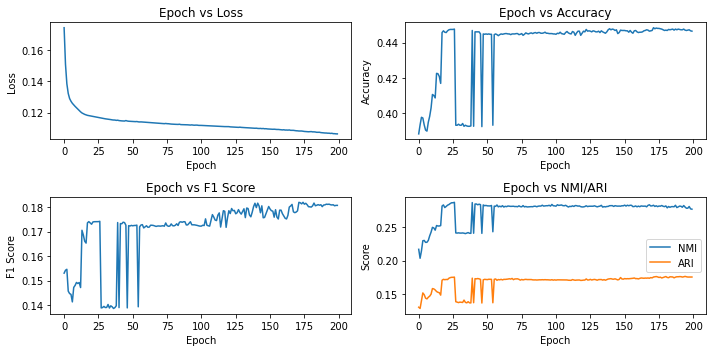

In [8]:
### Cases:
# File = [Pre-training file, gene_expresion data file, labels file]
File = ['../02-Data/Cases/cases_pre_train.pkl', '../02-Data/Cases/cases_X.txt', '../02-Data/Cases/cases_y.txt']
# Para = [batch_size, lr, epoch]
Para = [1024, 1e-3, 200]
# model_para = [n_enc_1(n_dec_3), n_enc_2(n_dec_2), n_enc_3(n_dec_1)]
model_para = [500, 500, 2000]
# Cluster_para = [n_cluster, n_init, n_input, n_z]
Cluster_para = [5, 20, 21209, 10]

model = AE(
            n_enc_1=model_para[0], n_enc_2=model_para[1], n_enc_3=model_para[2],
            n_dec_1=model_para[2], n_dec_2=model_para[1], n_dec_3=model_para[0], n_input=Cluster_para[2], n_z=Cluster_para[3], )


x = np.loadtxt(File[1], dtype=float)
y = np.loadtxt(File[2], dtype=int)

dataset = LoadDataset(x)
pretrain_ae(model, dataset, y)

In [31]:
torch.load('../02-Data/Cases/cases_pre_train.pkl')

OrderedDict([('enc_1.weight',
              tensor([[ 0.0091,  0.0100,  0.0012,  ..., -0.0026,  0.0083, -0.0022],
                      [ 0.0111,  0.0030,  0.0056,  ...,  0.0063,  0.0028, -0.0039],
                      [-0.0006,  0.0072,  0.0025,  ...,  0.0027, -0.0005, -0.0065],
                      ...,
                      [-0.0102,  0.0006, -0.0072,  ..., -0.0060, -0.0164, -0.0005],
                      [-0.0061, -0.0048, -0.0026,  ..., -0.0060, -0.0012, -0.0012],
                      [ 0.0046, -0.0039, -0.0050,  ..., -0.0031,  0.0197, -0.0058]])),
             ('enc_1.bias',
              tensor([-5.7544e-03,  2.2069e-03,  2.1292e-03, -2.2168e-03, -4.2936e-03,
                      -2.5729e-03,  1.0041e-03, -4.4309e-03, -2.5717e-03, -4.3909e-04,
                       2.7025e-03,  4.3569e-03,  1.6243e-03, -5.0390e-04,  2.4936e-03,
                      -3.0999e-03,  2.3555e-03,  9.4081e-04, -5.5145e-03,  4.6323e-03,
                       1.4934e-03,  2.8210e-03,  2.7554e-04,

AE(
  (enc_1): Linear(in_features=2000, out_features=500, bias=True)
  (BN1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_2): Linear(in_features=500, out_features=500, bias=True)
  (BN2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_3): Linear(in_features=500, out_features=2000, bias=True)
  (BN3): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (z_layer): Linear(in_features=2000, out_features=10, bias=True)
  (dec_1): Linear(in_features=10, out_features=2000, bias=True)
  (BN4): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dec_2): Linear(in_features=2000, out_features=500, bias=True)
  (BN5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dec_3): Linear(in_features=500, out_features=500, bias=True)
  (BN6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

89 loss: 0.5527870059013367
89 :acc 0.5388 , nmi 0.6244 , ari 0.4028 , f1 0.3344
90 loss: 0.5495026111602783
90 :acc 0.5413 , nmi 0.6336 , ari 0.4092 , f1 0.3343
91 loss: 0.5472448468208313
91 :acc 0.5426 , nmi 0.6286 , ari 0.4048 , f1 0.3375
92 loss: 0.5443143248558044
92 :acc 0.5407 , nmi 0.6314 , ari 0.4077 , f1 0.3341
93 loss: 0.5411364436149597
93 :acc 0.5426 , nmi 0.6342 , ari 0.4113 , f1 0.3352
94 loss: 0.5387020111083984
94 :acc 0.5433 , nmi 0.6353 , ari 0.4124 , f1 0.3350
95 loss: 0.5352043509483337
95 :acc 0.5426 , nmi 0.6347 , ari 0.4118 , f1 0.3342
96 loss: 0.5317175984382629
96 :acc 0.5426 , nmi 0.6347 , ari 0.4096 , f1 0.3352
97 loss: 0.5293543338775635
97 :acc 0.5407 , nmi 0.6200 , ari 0.4005 , f1 0.3369
98 loss: 0.5277333855628967
98 :acc 0.5420 , nmi 0.6327 , ari 0.4094 , f1 0.3348
99 loss: 0.5253450274467468
99 :acc 0.5439 , nmi 0.6367 , ari 0.4125 , f1 0.3360
100 loss: 0.5239942073822021
100 :acc 0.5394 , nmi 0.6296 , ari 0.4083 , f1 0.3328
101 loss: 0.52074420452117

188 loss: 0.3667169213294983
188 :acc 0.5207 , nmi 0.5398 , ari 0.3263 , f1 0.2996
189 loss: 0.3648119270801544
189 :acc 0.5394 , nmi 0.6210 , ari 0.4036 , f1 0.3322
190 loss: 0.36416542530059814
190 :acc 0.5381 , nmi 0.6152 , ari 0.4030 , f1 0.3304
191 loss: 0.36235520243644714
191 :acc 0.5207 , nmi 0.5406 , ari 0.3287 , f1 0.2993
192 loss: 0.3606615364551544
192 :acc 0.5394 , nmi 0.6191 , ari 0.4050 , f1 0.3316
193 loss: 0.3600735366344452
193 :acc 0.5401 , nmi 0.6061 , ari 0.3972 , f1 0.3360
194 loss: 0.35935425758361816
194 :acc 0.5368 , nmi 0.6187 , ari 0.4031 , f1 0.3296
195 loss: 0.3595365285873413
195 :acc 0.5413 , nmi 0.6098 , ari 0.3989 , f1 0.3375
196 loss: 0.3574883043766022
196 :acc 0.5207 , nmi 0.5441 , ari 0.3278 , f1 0.2996
197 loss: 0.35664889216423035
197 :acc 0.5187 , nmi 0.5419 , ari 0.3289 , f1 0.2979
198 loss: 0.35477110743522644
198 :acc 0.5187 , nmi 0.5376 , ari 0.3346 , f1 0.2952
199 loss: 0.35330453515052795
199 :acc 0.5233 , nmi 0.5407 , ari 0.3351 , f1 0.298

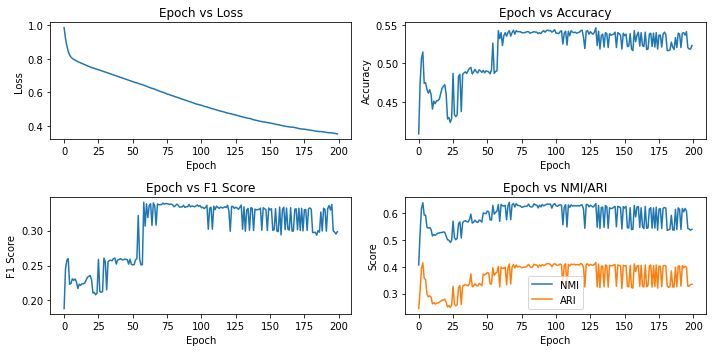

In [24]:
### Controls:
# File = [Pre-training file, gene_expresion data file, labels file]
File = ['../02-Data/Controls/controls_pre_train.pkl', '../02-Data/Controls/controls_X.txt', '../02-Data/Controls/controls_y.txt']
# Para = [batch_size, lr, epoch]
Para = [1024, 1e-3, 200]
# model_para = [n_enc_1(n_dec_3), n_enc_2(n_dec_2), n_enc_3(n_dec_1)]
model_para = [500, 500, 2000]
# Cluster_para = [n_cluster, n_init, n_input, n_z]
Cluster_para = [5, 20, 2000, 10]

model = AE(
            n_enc_1=model_para[0], n_enc_2=model_para[1], n_enc_3=model_para[2],
            n_dec_1=model_para[2], n_dec_2=model_para[1], n_dec_3=model_para[0], n_input=Cluster_para[2], n_z=Cluster_para[3], )


x = np.loadtxt(File[1], dtype=float)
y = np.loadtxt(File[2], dtype=int)

dataset = LoadDataset(x)
pretrain_ae(model, dataset, y)

In [30]:
torch.load('../02-Data/Controls/controls_pre_train.pkl')

OrderedDict([('enc_1.weight',
              tensor([[ 0.0119, -0.0103, -0.0060,  ..., -0.0051,  0.0006, -0.0067],
                      [-0.0240,  0.0168,  0.0233,  ...,  0.0130, -0.0137, -0.0334],
                      [ 0.0049, -0.0339, -0.0170,  ...,  0.0191,  0.0144,  0.0193],
                      ...,
                      [-0.0133, -0.0012,  0.0305,  ...,  0.0031,  0.0313,  0.0111],
                      [ 0.0107, -0.0340, -0.0047,  ...,  0.0191,  0.0241,  0.0272],
                      [ 0.0264,  0.0169, -0.0133,  ..., -0.0122, -0.0107, -0.0365]])),
             ('enc_1.bias',
              tensor([ 1.9371e-02, -7.4625e-03, -8.1335e-03,  7.4744e-04,  1.8030e-02,
                       8.2633e-04,  2.1022e-02, -6.5681e-04,  2.1209e-02, -1.7023e-02,
                      -1.3881e-02, -9.2084e-03,  1.7176e-02, -8.5008e-03, -1.4536e-02,
                      -1.4098e-02, -1.0662e-03, -1.4935e-02, -8.1932e-03,  7.1314e-03,
                       4.1561e-03,  1.1137e-02, -1.3311e-02,

4. Training:

In [332]:
# utils
import numpy as np
import scipy.sparse as sp
import h5py
import torch
import os
import sys
import time
import math
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.utils.data as data
from scipy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from torch.utils.data import Dataset
from torch.optim.optimizer import Optimizer


def load_graph(dataset, k):
    if k:
        path = '{}'.format(dataset, k)

    else:
        path = '{}'.format(dataset)

    data = np.loadtxt('{}'.format(dataset))
    n, _ = data.shape

    idx = np.array([i for i in range(n)], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt(path, dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(n, n), dtype=np.float32)

    # Construct a symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
    adj = adj + sp.eye(adj.shape[0])
    adj = normalize(adj)
    adj = sparse_mx_to_torch_sparse_tensor(adj)

    return adj


def normalize(mx):
    # Row-normalize sparse matrix
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    # Convert a scipy sparse matrix to a torch sparse tensor.
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)


class load_data(Dataset):
    def __init__(self, dataset):
        self.x = np.loadtxt('{}'.format(dataset), dtype=float)
        self.y = np.loadtxt('{}'.format(dataset), dtype=int)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return torch.from_numpy(np.array(self.x[idx])), \
               torch.from_numpy(np.array(self.y[idx])), \
               torch.from_numpy(np.array(idx))


# def cluster_acc(y_true, y_pred):
#     y_true = y_true.astype(np.int64)
#     assert y_pred.size == y_true.size
#     D = max(y_pred.max(), y_true.max()) + 1
#     w = np.zeros((D, D), dtype=np.int64)
#     for i in range(y_pred.size):
#         w[y_pred[i], y_true[i]] += 1
# #     from scipy.optimize import linear_sum_assignment
#     from scipy.optimize import linear_sum_assignment as linear_assignment
#     ind = linear_assignment(w.max() - w)
#     return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

class RAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, degenerated_to_sgd=True):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))

        self.degenerated_to_sgd = degenerated_to_sgd
        if isinstance(params, (list, tuple)) and len(params) > 0 and isinstance(params[0], dict):
            for param in params:
                if 'betas' in param and (param['betas'][0] != betas[0] or param['betas'][1] != betas[1]):
                    param['buffer'] = [[None, None, None] for _ in range(10)]
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay,
                        buffer=[[None, None, None] for _ in range(10)])
        super(RAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                buffered = group['buffer'][int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma

                    # more conservative since it's an approximated value
                    if N_sma >= 5:
                        step_size = math.sqrt(
                            (1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (
                                    N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    elif self.degenerated_to_sgd:
                        step_size = 1.0 / (1 - beta1 ** state['step'])
                    else:
                        step_size = -1
                    buffered[2] = step_size

                # more conservative since it's an approximated value
                if N_sma >= 5:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size * group['lr'], exp_avg, denom)
                    p.data.copy_(p_data_fp32)
                elif step_size > 0:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    p_data_fp32.add_(-step_size * group['lr'], exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss


class PlainRAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, degenerated_to_sgd=True):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))

        self.degenerated_to_sgd = degenerated_to_sgd
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)

        super(PlainRAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(PlainRAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                beta2_t = beta2 ** state['step']
                N_sma_max = 2 / (1 - beta2) - 1
                N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)

                # more conservative since it's an approximated value
                if N_sma >= 5:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    step_size = group['lr'] * math.sqrt(
                        (1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (
                                N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                    p.data.copy_(p_data_fp32)
                elif self.degenerated_to_sgd:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    step_size = group['lr'] / (1 - beta1 ** state['step'])
                    p_data_fp32.add_(-step_size, exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss


class AdamW(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, warmup=0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))

        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, warmup=warmup)
        super(AdamW, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamW, self).__setstate__(state)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                denom = exp_avg_sq.sqrt().add_(group['eps'])
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                if group['warmup'] > state['step']:
                    scheduled_lr = 1e-8 + state['step'] * group['lr'] / group['warmup']
                else:
                    scheduled_lr = group['lr']

                step_size = scheduled_lr * math.sqrt(bias_correction2) / bias_correction1

                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * scheduled_lr, p_data_fp32)

                p_data_fp32.addcdiv_(-step_size, exp_avg, denom)

                p.data.copy_(p_data_fp32)

        return loss


class RAdam_4step(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, update_all=False,
                 additional_four=False):
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        self.update_all = update_all  # whether update the first 4 steps
        self.additional_four = additional_four  # whether use additional 4 steps for SGD
        self.buffer = [[None, None] for ind in range(10)]
        super(RAdam_4step, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam_4step, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam_4step does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state[
                        'step'] = -4 if self.additional_four else 0  # since this exp requires exactly 4 step, it is hard coded
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                if state['step'] > 0:

                    state_step = state['step'] + 4 if self.additional_four else state[
                        'step']  # since this exp requires exactly 4 step, it is hard coded

                    buffered = self.buffer[int(state_step % 10)]
                    if state_step == buffered[0]:
                        step_size = buffered[1]
                    else:
                        buffered[0] = state_step
                        beta2_t = beta2 ** state['step']

                        if state['step'] > 4:  # since this exp requires exactly 4 step, it is hard coded
                            N_sma_max = 2 / (1 - beta2) - 1
                            N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                            step_size = group['lr'] * math.sqrt(
                                (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (
                                                    1 - beta1 ** state_step)
                        elif self.update_all:
                            step_size = group['lr'] / (1 - beta1 ** state_step)
                        else:
                            step_size = 0
                        buffered[1] = step_size

                    if state['step'] > 4:  # since this exp requires exactly 4 step, it is hard coded
                        if group['weight_decay'] != 0:
                            p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                        denom = (exp_avg_sq.sqrt() / math.sqrt(1 - beta2 ** state_step)).add_(group['eps'])
                        p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                        p.data.copy_(p_data_fp32)
                    elif self.update_all:
                        if group['weight_decay'] != 0:
                            p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                        denom = (exp_avg_sq.sqrt() / math.sqrt(1 - beta2 ** state_step))
                        p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                        p.data.copy_(p_data_fp32)
                else:
                    state_step = state['step'] + 4 if self.additional_four else state[
                        'step']  # since this exp requires exactly 4 step, it is hard coded

                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * 0.1, p_data_fp32)

                    step_size = 0.1 / (1 - beta1 ** state_step)
                    p_data_fp32.add_(-step_size, exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss

In [195]:
# preprocess
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pickle, os, numbers

import numpy as np
import scipy as sp
import pandas as pd
import scanpy as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


# TODO: Fix this
class AnnSequence:
    def __init__(self, matrix, batch_size, sf=None):
        self.matrix = matrix
        if sf is None:
            self.size_factors = np.ones((self.matrix.shape[0], 1),
                                        dtype=np.float32)
        else:
            self.size_factors = sf
        self.batch_size = batch_size

    def __len__(self):
        return len(self.matrix) // self.batch_size

    def __getitem__(self, idx):
        batch = self.matrix[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_sf = self.size_factors[idx * self.batch_size:(idx + 1) * self.batch_size]

        # return an (X, Y) pair
        return {'count': batch, 'size_factors': batch_sf}, batch


def read_dataset(adata, transpose=False, test_split=False, copy=False):
    if isinstance(adata, sc.AnnData):
        if copy:
            adata = adata.copy()
    elif isinstance(adata, str):
        adata = sc.read(adata)
    else:
        raise NotImplementedError

    norm_error = 'Make sure that the dataset (adata.X) contains unnormalized count data.'
    assert 'n_count' not in adata.obs, norm_error

    if adata.X.size < 50e6:  # check if adata.X is integer only if array is small
        if sp.sparse.issparse(adata.X):
            assert (adata.X.astype(float) != adata.X).nnz == 0, norm_error
        else:
            assert np.all(adata.X.astype(float) == adata.X), norm_error

    if transpose: adata = adata.transpose()

    if test_split:
        train_idx, test_idx = train_test_split(np.arange(adata.n_obs), test_size=0.1, random_state=42)
        spl = pd.Series(['train'] * adata.n_obs)
        spl.iloc[test_idx] = 'test'
        adata.obs['DCA_split'] = spl.values
    else:
        adata.obs['DCA_split'] = 'train'

    adata.obs['DCA_split'] = adata.obs['DCA_split'].astype('category')
    print('### Autoencoder: Successfully preprocessed {} genes and {} cells.'.format(adata.n_vars, adata.n_obs))

    return adata


def normalize(adata, filter_min_counts=True, size_factors=True, normalize_input=True, logtrans_input=True):
    if filter_min_counts:
        sc.pp.filter_genes(adata, min_counts=1)
        sc.pp.filter_cells(adata, min_counts=1)

    if size_factors or normalize_input or logtrans_input:
        adata.raw = adata.copy()
    else:
        adata.raw = adata

    if size_factors:
        sc.pp.normalize_per_cell(adata)
        adata.obs['size_factors'] = adata.obs.n_counts / np.median(adata.obs.n_counts)
    else:
        adata.obs['size_factors'] = 1.0

    if logtrans_input:
        sc.pp.log1p(adata)

    if normalize_input:
        sc.pp.scale(adata)

    return adata


def read_genelist(filename):
    genelist = list(set(open(filename, 'rt').read().strip().split('\n')))
    assert len(genelist) > 0, 'No genes detected in genelist file'
    print('### Autoencoder: Subset of {} genes will be denoised.'.format(len(genelist)))

    return genelist


def write_text_matrix(matrix, filename, rownames=None, colnames=None, transpose=False):
    if transpose:
        matrix = matrix.T
        rownames, colnames = colnames, rownames

    pd.DataFrame(matrix, index=rownames, columns=colnames).to_csv(filename,
                                                                  sep='\t',
                                                                  index=(rownames is not None),
                                                                  header=(colnames is not None),
                                                                  float_format='%.6f')

def read_pickle(inputfile):
    return pickle.load(open(inputfile, "rb"))

In [204]:
# layers
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


class ZINBLoss(nn.Module):
    def __init__(self):
        super(ZINBLoss, self).__init__()

    def forward(self, x, mean, disp, pi, scale_factor=1.0,    ridge_lambda=0.0):
        eps = 1e-10
        scale_factor = scale_factor[:, None]
        mean = mean * scale_factor
        
        t1 = torch.lgamma(disp+eps) + torch.lgamma(x+1.0) - torch.lgamma(x+disp+eps)
        t2 = (disp+x) * torch.log(1.0 + (mean/(disp+eps))) + (x * (torch.log(disp+eps) - torch.log(mean+eps)))
        nb_final = t1 + t2

        nb_case = nb_final - torch.log(1.0-pi+eps)
        zero_nb = torch.pow(disp/(disp+mean+eps), disp)
        zero_case = -torch.log(pi + ((1.0-pi)*zero_nb)+eps)
        result = torch.where(torch.le(x, 1e-8), zero_case, nb_case)
        
        if ridge_lambda > 0:
            ridge = ridge_lambda*torch.square(pi)
            result += ridge
        result = torch.mean(result)
        return result


class GaussianNoise(nn.Module):
    def __init__(self, sigma=0):
        super(GaussianNoise, self).__init__()
        self.sigma = sigma
    
    def forward(self, x):
        if self.training:
            x = x + self.sigma * torch.randn_like(x)
        return x


class MeanAct(nn.Module):
    def __init__(self):
        super(MeanAct, self).__init__()
    def forward(self, x):
        return torch.clamp(torch.exp(x), min=1e-5, max=1e6)

class DispAct(nn.Module):
    def __init__(self):
        super(DispAct, self).__init__()
    def forward(self, x):
        return torch.clamp(F.softplus(x), min=1e-4, max=1e4)

In [197]:
# GNN
import math
import torch
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
from torch.autograd import Variable

class GNNLayer(Module):
    def __init__(self, in_features, out_features):
        super(GNNLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        torch.nn.init.xavier_uniform_(self.weight)
        # When passing through the network layer, the input and output variances are the same
        # including forward propagation and backward propagation

    def forward(self, features, adj, active=True):
        support = torch.mm(features, self.weight)
        output = torch.spmm(adj, support)
        if active:
            output = F.relu(output)
        return output

In [231]:
from __future__ import print_function, division
import argparse
import random
import numpy as np
from sklearn.cluster import KMeans
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import Adam
from torch.nn import Linear
from torch.utils.data import DataLoader, TensorDataset
import h5py
import scanpy as sc
from torch.autograd import Variable
import os
from sklearn.metrics import adjusted_rand_score as ari_score
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from time import time as get_time
import sys

class AE(nn.Module):
    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                 n_input, n_z1, n_z2, n_z3):
        super(AE, self).__init__()

        self.enc_1 = Linear(n_input, n_enc_1)
        self.BN1 = nn.BatchNorm1d(n_enc_1)
        self.enc_2 = Linear(n_enc_1, n_enc_2)
        self.BN2 = nn.BatchNorm1d(n_enc_2)
        self.enc_3 = Linear(n_enc_2, n_enc_3)
        self.BN3 = nn.BatchNorm1d(n_enc_3)

        self.z1_layer = Linear(n_enc_3, n_z1)
        self.BN4 = nn.BatchNorm1d(n_z1)
        self.z2_layer = Linear(n_z1, n_z2)
        self.BN5 = nn.BatchNorm1d(n_z2)
        self.z3_layer = Linear(n_z2, n_z3)
        self.BN6 = nn.BatchNorm1d(n_z3)

        self.dec_1 = Linear(n_z3, n_dec_1)
        self.BN7 = nn.BatchNorm1d(n_dec_1)
        self.dec_2 = Linear(n_dec_1, n_dec_2)
        self.BN8 = nn.BatchNorm1d(n_dec_2)
        self.dec_3 = Linear(n_dec_2, n_dec_3)
        self.BN9 = nn.BatchNorm1d(n_dec_3)
        self.x_bar_layer = Linear(n_dec_3, n_input)


    def forward(self, x):
        enc_h1 = F.relu(self.BN1(self.enc_1(x)))
        enc_h2 = F.relu(self.BN2(self.enc_2(enc_h1)))
        enc_h3 = F.relu(self.BN3(self.enc_3(enc_h2)))

        z1 = self.BN4(self.z1_layer(enc_h3))
        z2 = self.BN5(self.z2_layer(z1))
        z3 = self.BN6(self.z3_layer(z2))

        dec_h1 = F.relu(self.BN7(self.dec_1(z3)))
        dec_h2 = F.relu(self.BN8(self.dec_2(dec_h1)))
        dec_h3 = F.relu(self.BN9(self.dec_3(dec_h2)))
        x_bar = self.x_bar_layer(dec_h3)

        return x_bar, enc_h1, enc_h2, enc_h3, z3, z2, z1, dec_h3


class SDCN(nn.Module):
    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                 n_input, n_z1, n_z2, n_z3, n_clusters, v=1):
        super(SDCN, self).__init__()
        self.ae = AE(
            n_enc_1=n_enc_1,
            n_enc_2=n_enc_2,
            n_enc_3=n_enc_3,

            n_dec_1=n_dec_1,
            n_dec_2=n_dec_2,
            n_dec_3=n_dec_3,

            n_input=n_input,
            n_z1=n_z1,
            n_z2=n_z2,
            n_z3=n_z3,
        )
        
#         self.ae.load_state_dict(torch.load(args.pretrain_path, map_location='cpu'))
        torch.load(args.pretrain_path, map_location='cpu')
        self.gnn_1 = GNNLayer(n_input, n_enc_1)
        self.gnn_2 = GNNLayer(n_enc_1, n_enc_2)
        self.gnn_3 = GNNLayer(n_enc_2, n_enc_3)
        self.gnn_4 = GNNLayer(n_enc_3, n_z1)
        self.gnn_5 = GNNLayer(n_z1, n_z2)
        self.gnn_6 = GNNLayer(n_z2, n_z3)
        self.gnn_7 = GNNLayer(n_z3, n_clusters)

        # cluster layer
        self.cluster_layer = Parameter(torch.Tensor(n_clusters, n_z3))
        torch.nn.init.xavier_normal_(self.cluster_layer.data)
        self._dec_mean = nn.Sequential(nn.Linear(n_dec_3, n_input), MeanAct())
        self._dec_disp = nn.Sequential(nn.Linear(n_dec_3, n_input), DispAct())
        self._dec_pi = nn.Sequential(nn.Linear(n_dec_3, n_input), nn.Sigmoid())
        # degree
        self.v = v
        self.zinb_loss = ZINBLoss().cuda()

    def forward(self, x, adj):
        # DNN Module
        x_bar, tra1, tra2, tra3, z3, z2, z1, dec_h3 = self.ae(x)

        sigma = 0.5
        # GCN Module
        h = self.gnn_1(x, adj)
        h = self.gnn_2((1 - sigma) * h + sigma * tra1, adj)
        h = self.gnn_3((1 - sigma) * h + sigma * tra2, adj)
        h = self.gnn_4((1 - sigma) * h + sigma * tra3, adj)
        h = self.gnn_5((1 - sigma) * h + sigma * z1, adj)
        h = self.gnn_6((1 - sigma) * h + sigma * z2, adj)
        h = self.gnn_7((1 - sigma) * h + sigma * z3, adj, active=False)

        predict = F.softmax(h, dim=1)

        _mean = self._dec_mean(dec_h3)
        _disp = self._dec_disp(dec_h3)
        _pi = self._dec_pi(dec_h3)
        zinb_loss = self.zinb_loss

        q = 1.0 / (1.0 + torch.sum(torch.pow(z3.unsqueeze(1) - self.cluster_layer, 2), 2) / self.v)
        q = q.pow((self.v + 1.0) / 2.0)
        q = (q.t() / torch.sum(q, 1)).t()

        return x_bar, q, predict, z3, _mean, _disp, _pi, zinb_loss



def target_distribution(q):

    weight = q ** 2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()


def train_sdcn(dataset, X_raw, sf):
    global p
    model = SDCN(
                 n_enc_1=args.n_enc_1,
                 n_enc_2=args.n_enc_2,
                 n_enc_3=args.n_enc_3,
                 n_dec_1=args.n_dec_1,
                 n_dec_2=args.n_dec_2,
                 n_dec_3=args.n_dec_3,
                 n_input=args.n_input,
                 n_z1=args.n_z1,
                 n_z2=args.n_z2,
                 n_z3=args.n_z3,
                 n_clusters=args.n_clusters,
                 v=1).to(device)
    print(model)
    # optimizer = Adam(model.parameters(), lr=args.lr)
    optimizer = RAdam(model.parameters(), lr=args.lr)

    adj = load_graph(args.graph, args.k)
    print(args.k)
    adj = adj


    data = torch.Tensor(dataset.x).to(device)
    y = dataset.y

    with torch.no_grad():
        _, _, _, _, z, _, _, _ = model.ae(data)

    kmeans = KMeans(n_clusters=args.n_clusters, n_init=args.n_init)
    y_pred = kmeans.fit_predict(z.data.cpu().numpy())
    y_pred_last = y_pred
    model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_).to(device)
#     eva(y, y_pred, 0)
    eva(sf, y_pred, 0)

    for epoch in range(Para[2]):
        if epoch % 1 == 0:
            _, tmp_q, pred, _, _, _, _, _ = model(data, adj)
            tmp_q = tmp_q.data
            p = target_distribution(tmp_q)

            res1 = tmp_q.cpu().numpy().argmax(1)  # Q
            res2 = pred.data.cpu().numpy().argmax(1)  # Z
            res3 = p.data.cpu().numpy().argmax(1)  # P
            # eva(y, res1, str(epoch) + 'Q')
            # eva(y, res2, str(epoch) + 'Z')
            # eva(y, res3, str(epoch) + 'P')
            eva(y, res2, epoch)


        x_bar, q, pred, z, meanbatch, dispbatch, pibatch, zinb_loss = model(data, adj)

        binary_crossentropy_loss = F.binary_cross_entropy(q, p)
        ce_loss = F.kl_div(pred.log(), p, reduction='batchmean')
        re_loss = F.mse_loss(x_bar, data)
        X_raw = torch.tensor(X_raw).cuda()
        sf = torch.tensor(sf).cuda()

        zinb_loss = zinb_loss(X_raw, meanbatch, dispbatch, pibatch, sf)
        loss = Balance_para[0] * binary_crossentropy_loss + Balance_para[1] * ce_loss + Balance_para[2] * re_loss +Balance_para[3] * zinb_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



if __name__ == "__main__":

    time_start = get_time()
    parser = argparse.ArgumentParser(
        description='train',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)

In [361]:
### Cases:
# File = [gene_expresion data file, Graph file, Pre-training file, h5 file]
File = ['../02-Data/Cases/cases_X.txt', "../02-Data/Cases/cases_graph.txt", 
        '../02-Data/Cases/cases_pre_train.pkl', "../02-Data/Cases/cases.h5ad"]
# model_para = [n_enc_1(n_dec_3), n_enc_2(n_dec_2), n_enc_3(n_dec_1), n_cluster, n_init]
model_para = [1000, 1000, 4000]
# Para = [batch_size, lr, epoch]
Para = [2048, 1e-4, 80]
# Cluster_para = [n_cluster, n_z1, n_z2, n_z3, n_input, n_init]
Cluster_para = [7, 2000, 500, 10, 21209, 20]
# Balance_para = [binary_crossentropy_loss, ce_loss, re_loss, zinb_loss, balance]
Balance_para = [0.1, 0.01, 1, 0.1, 0.5]

parser = argparse.ArgumentParser()

parser.add_argument('-f')
parser.add_argument('--name', type=str, default=File[0])
parser.add_argument('--graph', type=str, default=File[1])
parser.add_argument('--pretrain_path', type=str, default=File[2])
parser.add_argument('--n_enc_1', default=model_para[0], type=int)
parser.add_argument('--n_enc_2', default=model_para[1], type=int)
parser.add_argument('--n_enc_3', default=model_para[2], type=int)
parser.add_argument('--n_dec_1', default=model_para[2], type=int)
parser.add_argument('--n_dec_2', default=model_para[1], type=int)
parser.add_argument('--n_dec_3', default=model_para[0], type=int)

parser.add_argument('--k', type=int, default=None)
parser.add_argument('--lr', type=float, default=Para[1])

parser.add_argument('--n_clusters', default=Cluster_para[0], type=int)
parser.add_argument('--n_z1', default=Cluster_para[1], type=int)
parser.add_argument('--n_z2', default=Cluster_para[2], type=int)
parser.add_argument('--n_z3', default=Cluster_para[3], type=int)
parser.add_argument('--n_input', type=int, default=Cluster_para[4])
parser.add_argument('--n_init', type=int, default=Cluster_para[5])

args = parser.parse_args()
args.cuda = torch.cuda.is_available()
print("use cuda: {}".format(args.cuda))

device = torch.device("cuda" if args.cuda else "cpu")
args.pretrain_path = File[2]
dataset = load_data(args.name)

# data_mat = h5py.File(File[3], "r+")
# x = np.array(data_mat['X'])
# y = np.array(data_mat['obs']['seurat_clusters'])
# adata = sc.AnnData(x)
adata = sc.read_h5ad("../02-Data/Cases/cases.h5ad")
adata.obs['Group'] = y
# adata = read_dataset(adata,
#                      transpose=False,
#                      test_split=False,
#                      copy=True)

# adata = normalize(adata,
#                   size_factors=True,
#                   normalize_input=True,
#                   logtrans_input=True)
X = adata.X
X_raw = adata.raw
sf = adata.obs['Group']
dataset1 = TensorDataset(torch.Tensor(X.shape[0]), torch.Tensor(X.shape[0]), torch.Tensor(sf))
dataloader = DataLoader(dataset1, batch_size=Para[0], shuffle=True)
train_sdcn(dataset, X_raw, sf)

time = get_time() - time_start
print("Running Time：", time)

use cuda: False


/var/folders/dr/c6_fdc5s1gj9kwgvmg4_4gmc0000gn/T/ipykernel_39775/1353073617.py:73: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  self.y = np.loadtxt('{}'.format(dataset), dtype=int)


SDCN(
  (ae): AE(
    (enc_1): Linear(in_features=21209, out_features=1000, bias=True)
    (BN1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc_2): Linear(in_features=1000, out_features=1000, bias=True)
    (BN2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc_3): Linear(in_features=1000, out_features=4000, bias=True)
    (BN3): BatchNorm1d(4000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (z1_layer): Linear(in_features=4000, out_features=2000, bias=True)
    (BN4): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (z2_layer): Linear(in_features=2000, out_features=500, bias=True)
    (BN5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (z3_layer): Linear(in_features=500, out_features=10, bias=True)
    (BN6): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dec_1): 

RuntimeError: addmm: Argument #3 (dense): Expected dim 0 size 51050, got 5105

In [333]:
### Controls:
# File = [gene_expresion data file, Graph file, Pre-training file, h5 file]
File = ['../02-Data/Controls/controls_X.txt', "../02-Data/Controls/controls_graph.txt", 
        '../02-Data/Controls/controls_pre_train.pkl', "../02-Data/Controls/controls.h5ad"]
# model_para = [n_enc_1(n_dec_3), n_enc_2(n_dec_2), n_enc_3(n_dec_1), n_cluster, n_init]
model_para = [1000, 1000, 4000]
# Para = [batch_size, lr, epoch]
Para = [2048, 1e-4, 80]
# Cluster_para = [n_cluster, n_z1, n_z2, n_z3, n_input, n_init]
Cluster_para = [7, 2000, 500, 10, 2000, 20]
# Balance_para = [binary_crossentropy_loss, ce_loss, re_loss, zinb_loss, balance]
Balance_para = [0.1, 0.01, 1, 0.1, 0.5]

parser = argparse.ArgumentParser()

parser.add_argument('-f')
parser.add_argument('--name', type=str, default=File[0])
parser.add_argument('--graph', type=str, default=File[1])
parser.add_argument('--pretrain_path', type=str, default=File[2])
parser.add_argument('--n_enc_1', default=model_para[0], type=int)
parser.add_argument('--n_enc_2', default=model_para[1], type=int)
parser.add_argument('--n_enc_3', default=model_para[2], type=int)
parser.add_argument('--n_dec_1', default=model_para[2], type=int)
parser.add_argument('--n_dec_2', default=model_para[1], type=int)
parser.add_argument('--n_dec_3', default=model_para[0], type=int)

parser.add_argument('--k', type=int, default=None)
parser.add_argument('--lr', type=float, default=Para[1])

parser.add_argument('--n_clusters', default=Cluster_para[0], type=int)
parser.add_argument('--n_z1', default=Cluster_para[1], type=int)
parser.add_argument('--n_z2', default=Cluster_para[2], type=int)
parser.add_argument('--n_z3', default=Cluster_para[3], type=int)
parser.add_argument('--n_input', type=int, default=Cluster_para[4])
parser.add_argument('--n_init', type=int, default=Cluster_para[5])

args = parser.parse_args()
args.cuda = torch.cuda.is_available()
print("use cuda: {}".format(args.cuda))

device = torch.device("cuda" if args.cuda else "cpu")
args.pretrain_path = File[2]
dataset = load_data(args.name)

data_mat = h5py.File(File[3], "r+")
x = np.array(data_mat['X'])
y = np.array(data_mat['obs']['seurat_clusters'])
adata = sc.AnnData(x)
adata.obs['Group'] = y
# adata = read_dataset(adata,
#                      transpose=False,
#                      test_split=False,
#                      copy=True)

# adata = normalize(adata,
#                   size_factors=True,
#                   normalize_input=True,
#                   logtrans_input=True)
X = adata.X
# X_raw = adata.raw
sf = adata.obs['Group']
dataset1 = TensorDataset(torch.Tensor(X), torch.Tensor(X), torch.Tensor(sf))
dataloader = DataLoader(dataset1, batch_size=Para[0], shuffle=True)
train_sdcn(dataset, X_raw, sf)

time = get_time() - time_start
print("Running Time：", time)

use cuda: False


/var/folders/dr/c6_fdc5s1gj9kwgvmg4_4gmc0000gn/T/ipykernel_39775/1353073617.py:73: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  self.y = np.loadtxt('{}'.format(dataset), dtype=int)


SDCN(
  (ae): AE(
    (enc_1): Linear(in_features=2000, out_features=1000, bias=True)
    (BN1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc_2): Linear(in_features=1000, out_features=1000, bias=True)
    (BN2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc_3): Linear(in_features=1000, out_features=4000, bias=True)
    (BN3): BatchNorm1d(4000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (z1_layer): Linear(in_features=4000, out_features=2000, bias=True)
    (BN4): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (z2_layer): Linear(in_features=2000, out_features=500, bias=True)
    (BN5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (z3_layer): Linear(in_features=500, out_features=10, bias=True)
    (BN6): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dec_1): L

RuntimeError: addmm: Argument #3 (dense): Expected dim 0 size 15483, got 1548

In [1]:
import tensorflow as tf
from tensorflow import keras

2023-06-30 09:25:36.158031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
